# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
# Hide warnings for cleaner display
warnings.filterwarnings('ignore')

# Configure some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Basic configurations for improving visualization of graphs

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

# Reading the dataset

In [4]:
df = pd.read_csv('./../dataset/USvideos.csv')

### Let's see what our dataset looks like by displaying its first few rows

In [5]:
df.head()
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

Now, let's see some information about our dataset using the info() method.

In [6]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

We can see that there are 40,949 entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have 40,949 non-null entries) except for description column which has some null values; it only has 40,379 non-null values.

# Data Cleaning

The description column has some rows containing null values represented by NaN. Let's have a look at them.

In [7]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the description column.

In [8]:
df["description"] = df["description"].fillna(value="")
df[df["description"].apply(lambda x: pd.isna(x))].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


 description with NaN is cleared


# Trending Videos per Year

Let's see in which years the data was collected

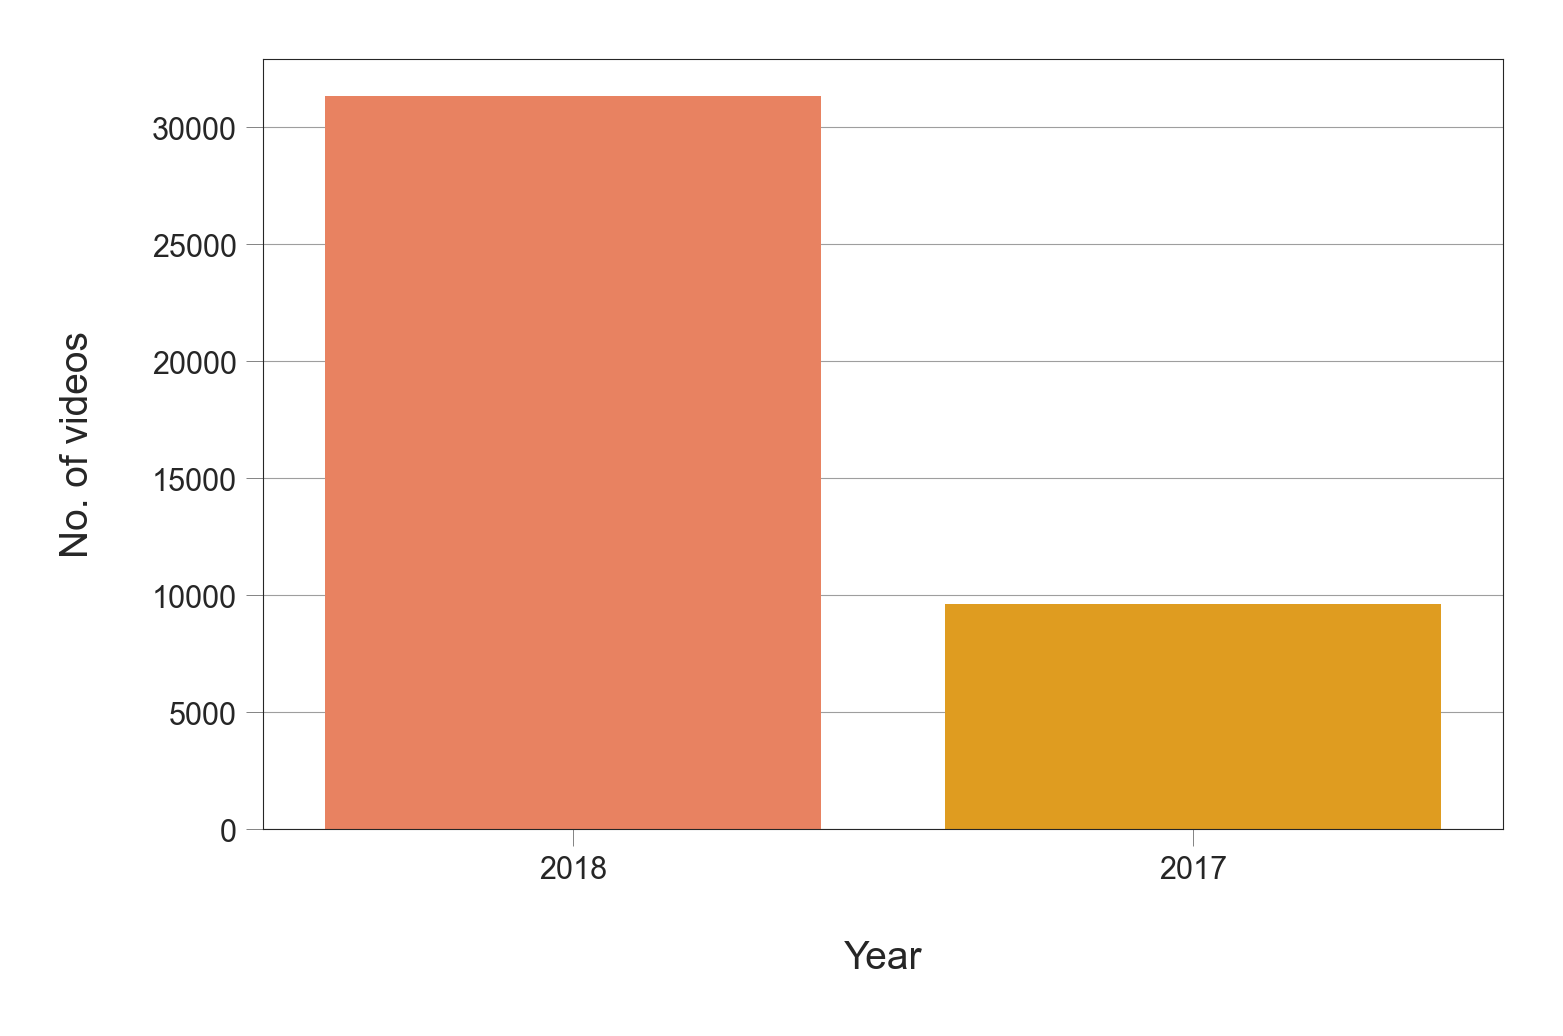

In [9]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts().to_frame()

fig, ax = plt.subplots()

_ = sns.barplot(x="trending_date", y="count", data=cdf, palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)

_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [10]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

trending_date
2018   0.77
2017   0.23
Name: proportion, dtype: float64

We can see that the dataset was collected in 2017 and 2018 with around 77% of it in 2018 and 23% in 2017.

# Description of numerical columns

Now, let's see some statistical information about the numerical columns of our dataset

In [11]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


From the above table

* The average number of views on a trending video is `2,360,784`. The median value for the number of views is `681,861` , which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
* The average number of likes on a trending video is `742,66` , while the average number of dislikes is `3,711`. 
* The average comment count is `8,446` while the median is `1,856`.

## Views Histogram


Let's plot a histogram for the views column to take a look at its distribution: to see how many videos have views between 10 million and 20 million, how many videos have between 20 million and 30 million, and so on

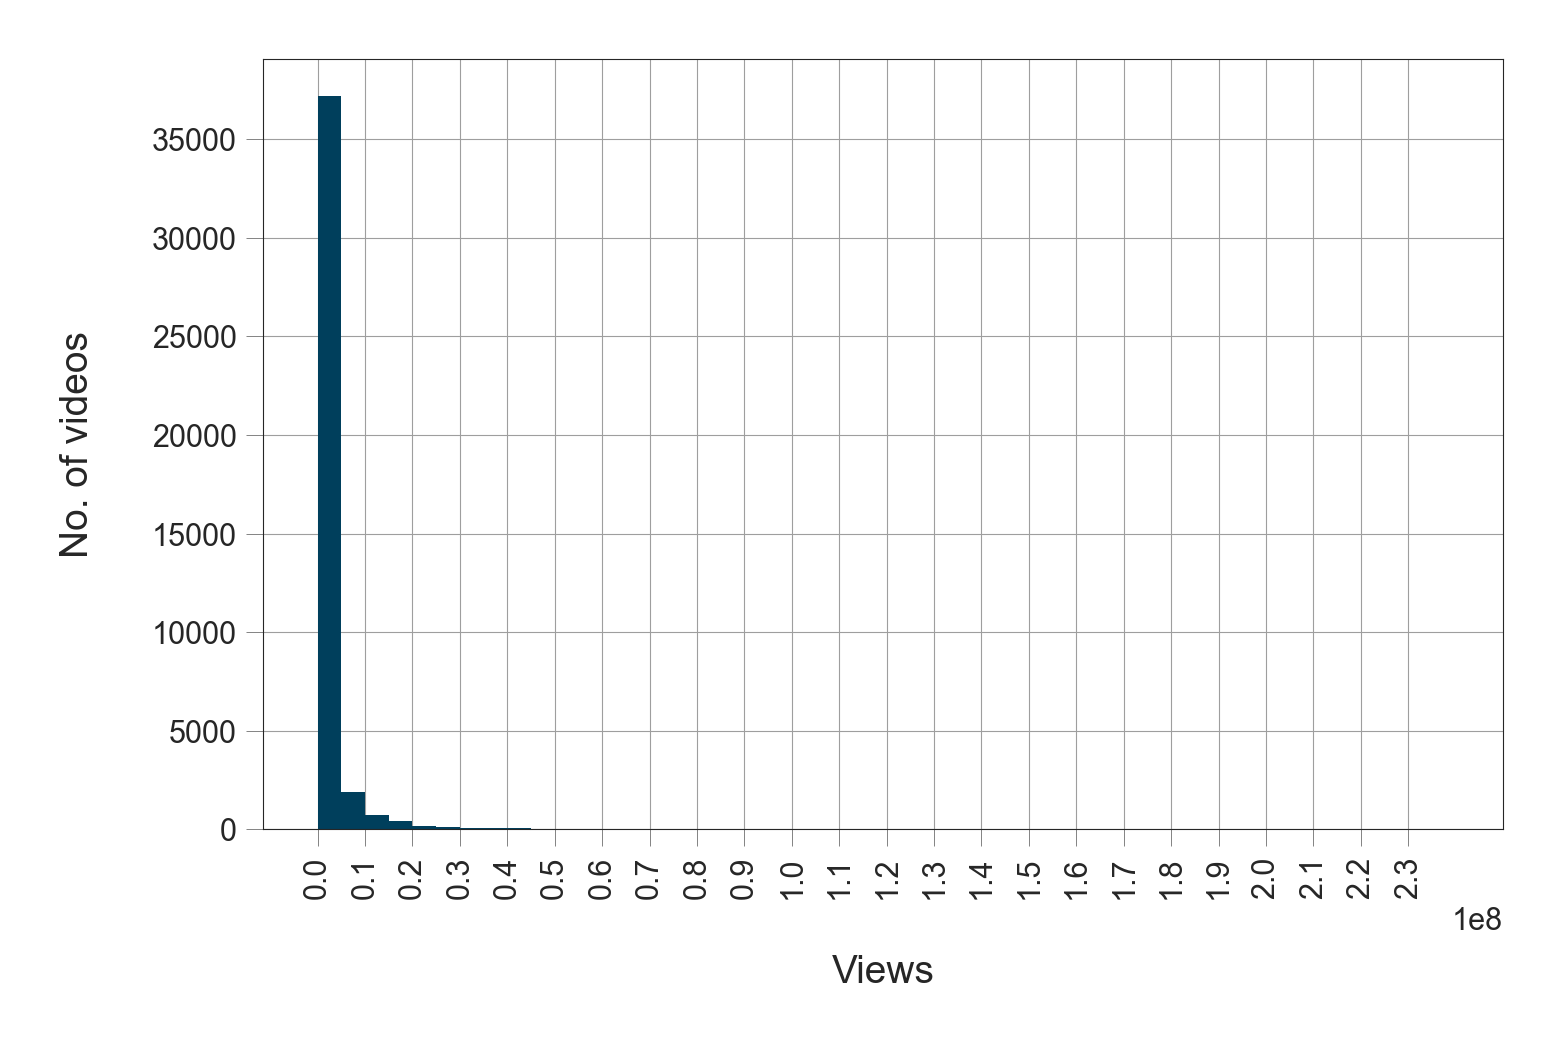

In [12]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

Now let's plot the histogram just for videos with 45 million views or less to get a closer look at the distribution of the data.

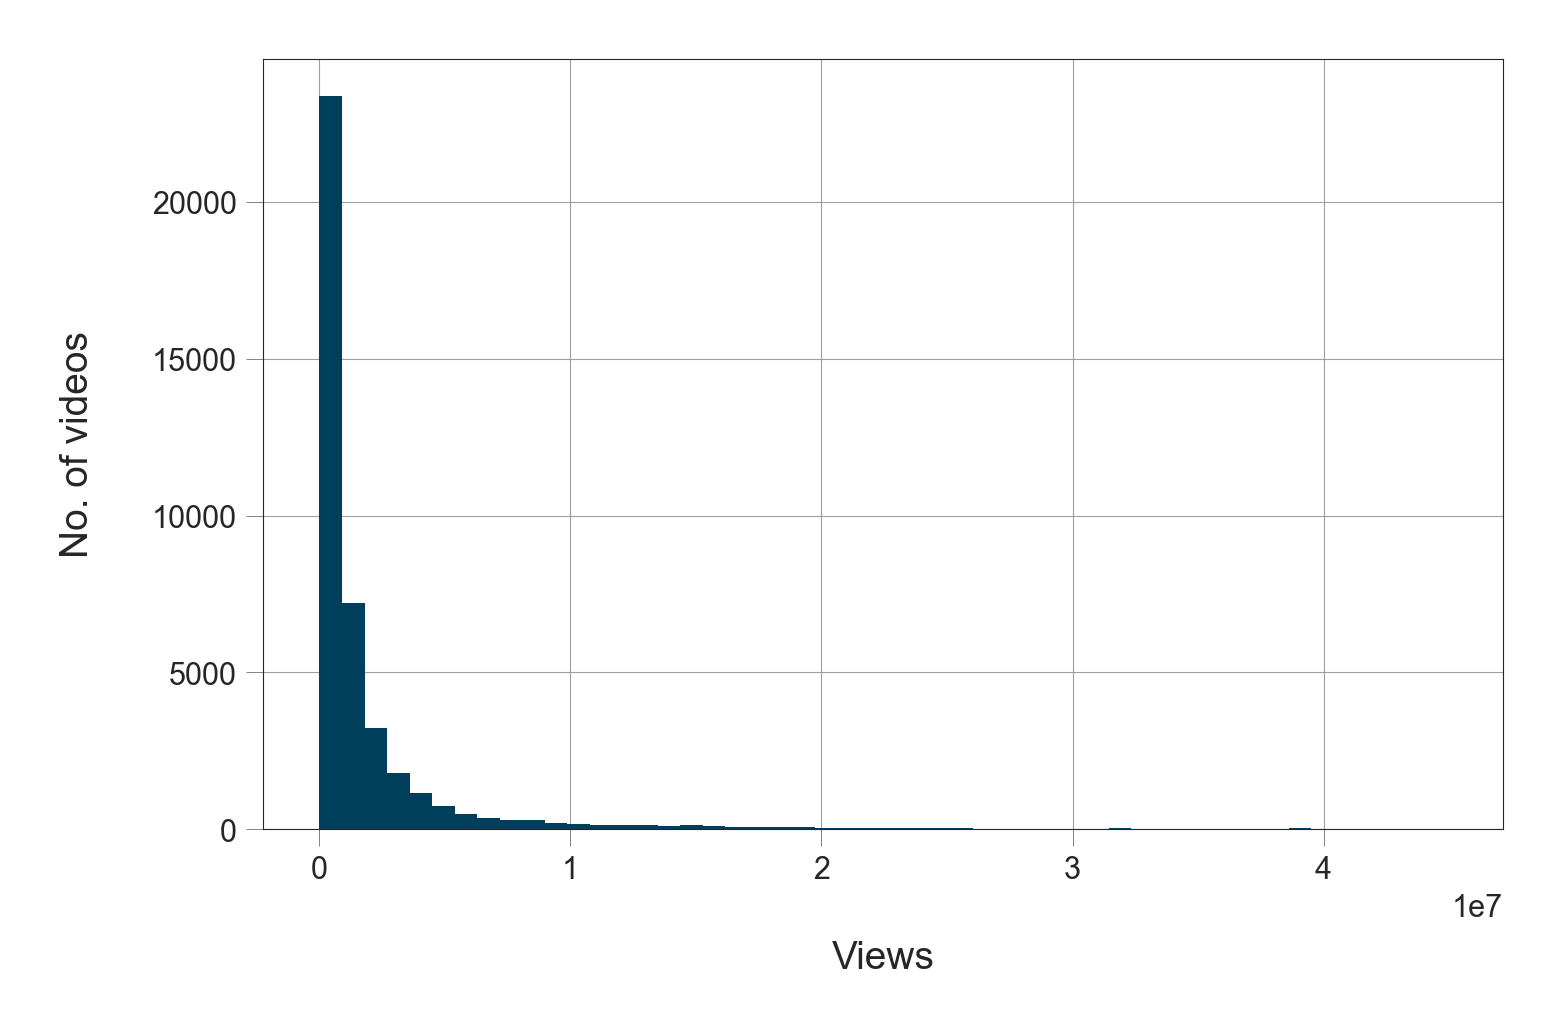

In [13]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 45e6]["views"], kde=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

Now we see that the majority of trending videos have 1 million views or less.

 Let's see the exact percentage of videos less than 1 million views.

In [14]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

60.09426359618062

In [15]:
df[df['views'] < 1.5e6]['views'].count() / df['views'].count() * 100

70.74653837700554

In [16]:
df[df['views'] < 5e6]['views'].count() / df['views'].count() * 100

90.81052040342865

So, it is around `60%`. Similarly, we can see that the percentage of videos with less than 1.5 million views is around `70%`, and that the percentage of videos with less than 5 million views is around `90%`.

## Likes Histogram

Let's plot histogram for likes, now.

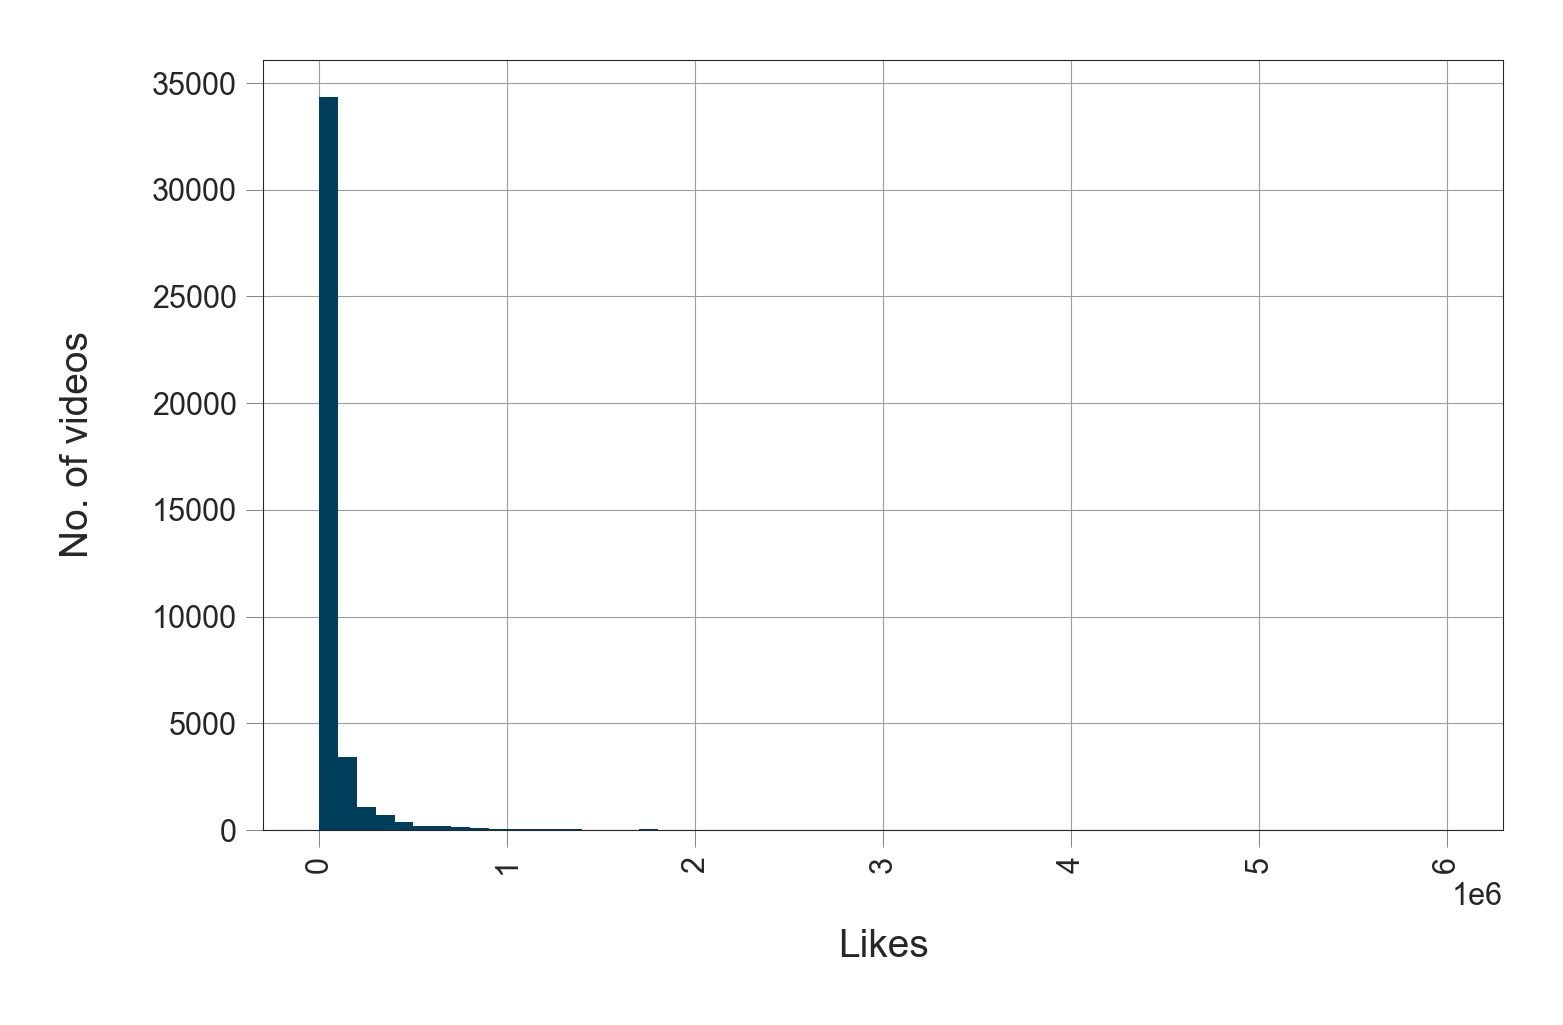

In [17]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have between 0 and 100,000 likes. Let's plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data

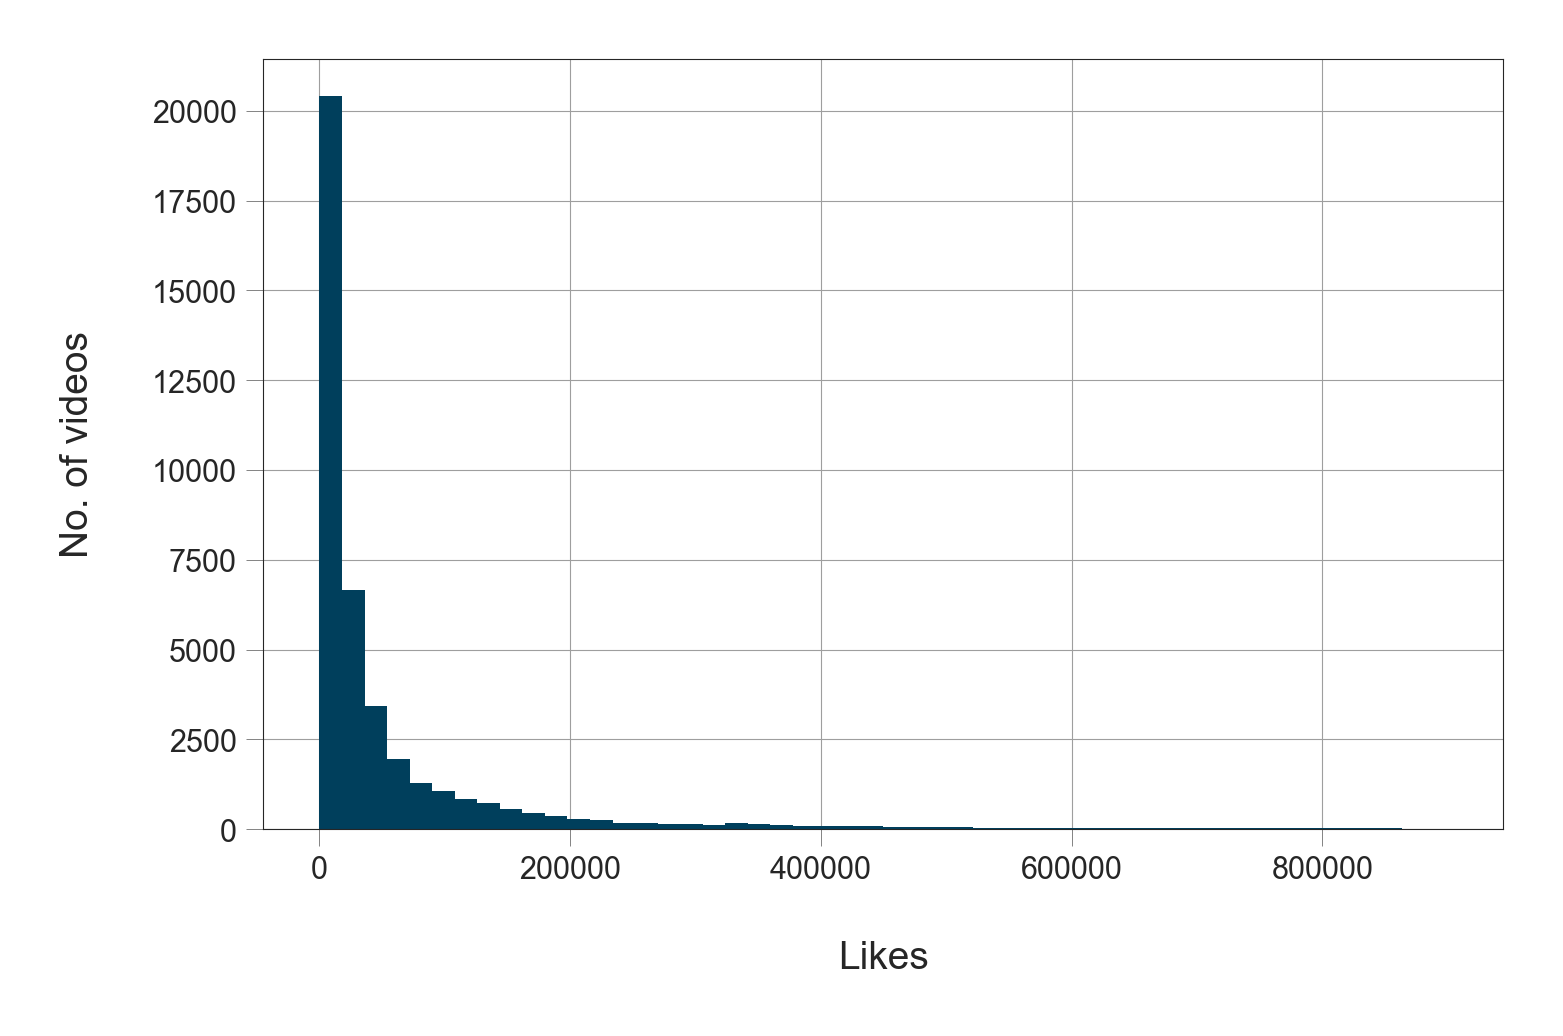

In [18]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 9e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have 30,000 likes or less with a peak for videos with 2,500 likes or less.

Let's see the exact percentage of videos with less than 30,000 likes

In [19]:
df[df['likes'] < 3e4]['likes'].count() / df['likes'].count() * 100

62.003956140565094

In [20]:
df[df['likes'] < 10e4]['likes'].count() / df['likes'].count() * 100

83.91657915944222

We see that the percentage of videos with less than 30,000 likes is around `62%`.
Similarly, we can see that the percentage of videos with less than 100,000 likes is around `83%`.

## Comment Count Histogram

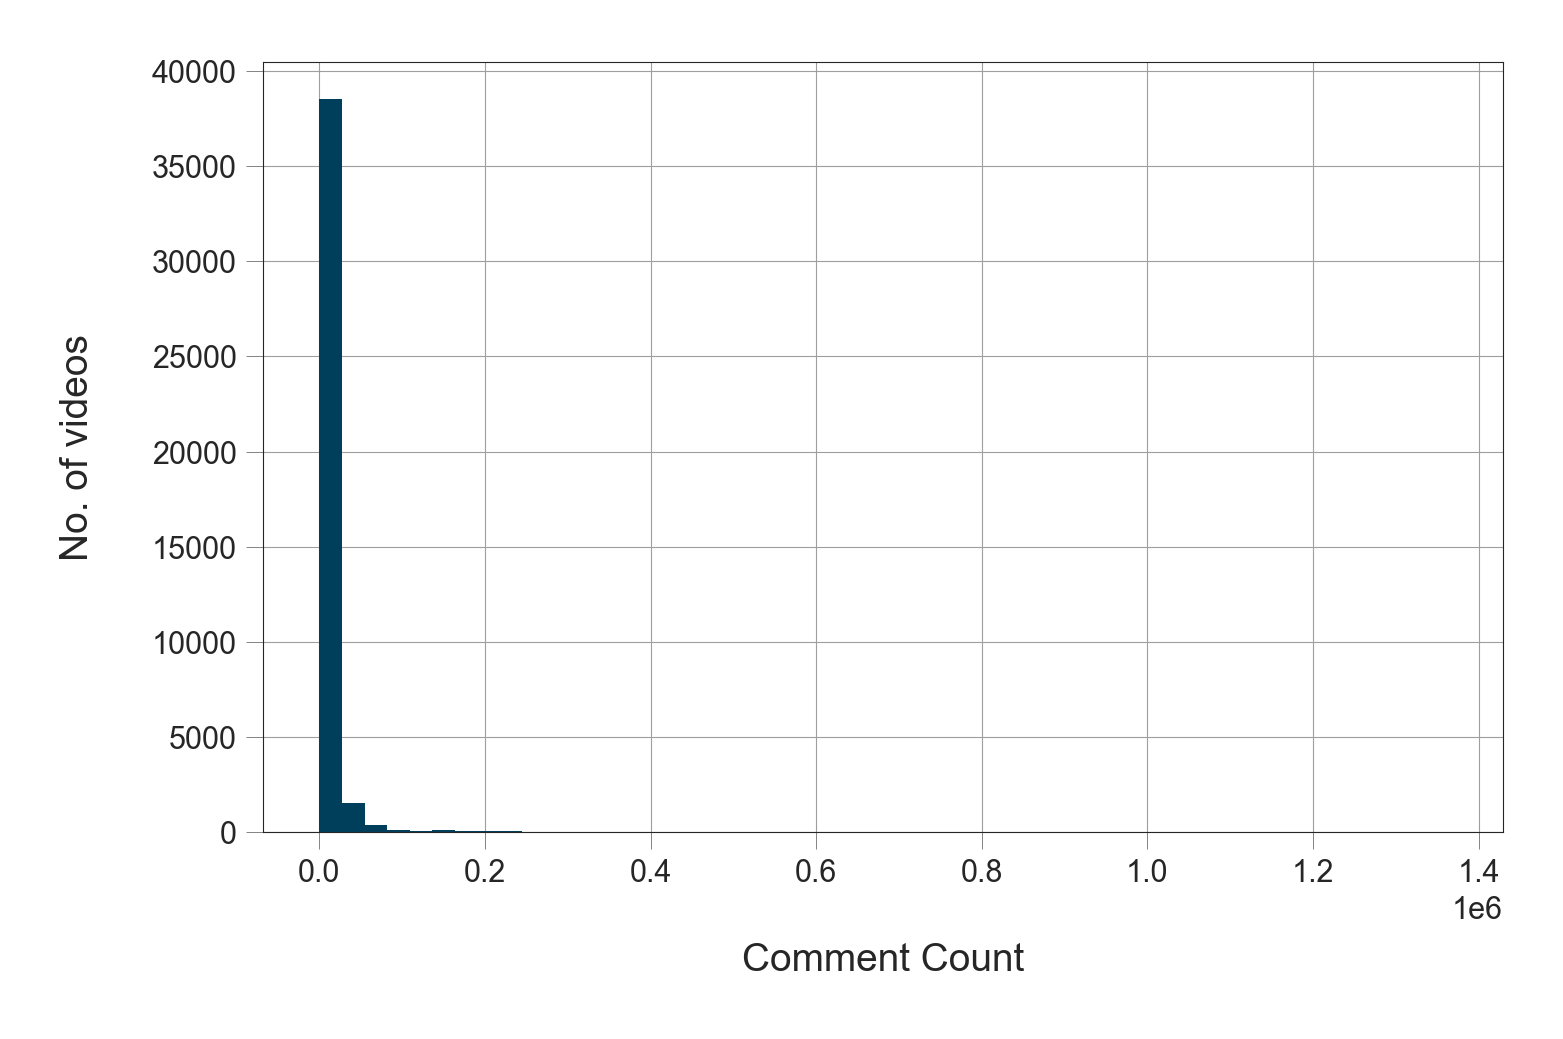

In [21]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

Let's get a closer look by eliminating entries with comment count larger than `300,000`.

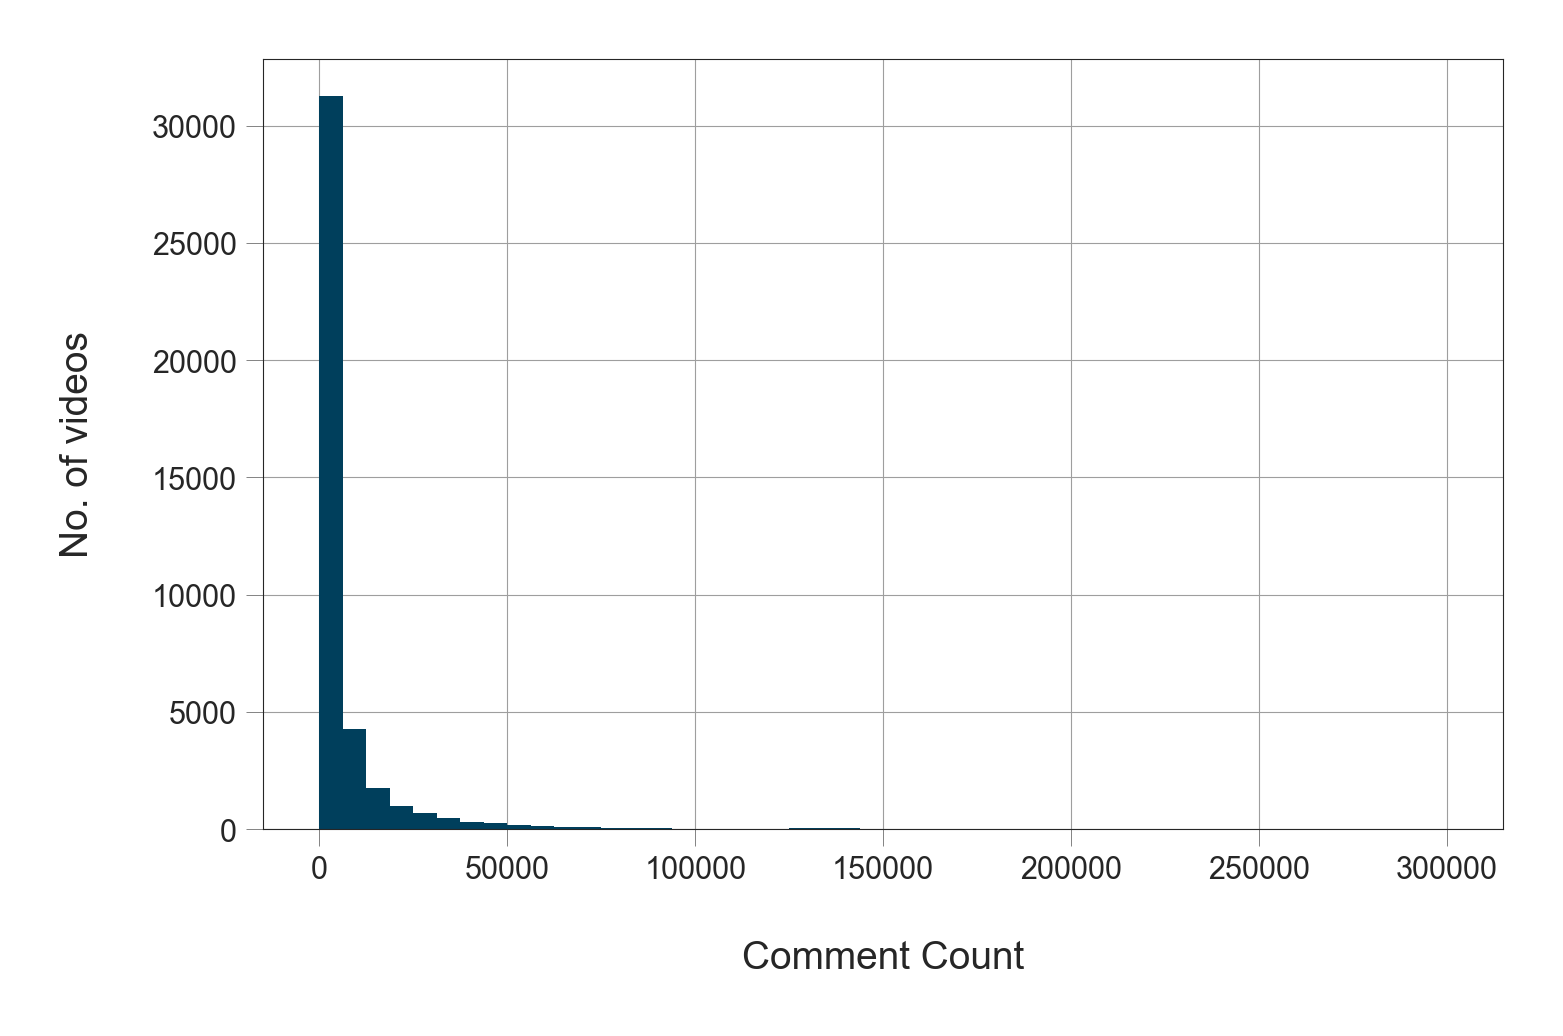

In [22]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 3e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around

$$\frac{50000}{7}≈7142 \ comments $$
 
since each division in the graph has seven histogram bins.

As with views and likes, let's see the exact percentage of videos with less than 7000 comments

In [23]:
df[df['comment_count'] < 7000]['comment_count'].count() / df['comment_count'].count() * 100

78.4170553615473

In [24]:
df[df['comment_count'] < 50000]['comment_count'].count() / df['comment_count'].count() * 100

97.55549586070478

Thus, we see that percentage of videos with comment count less than 7000 is around `78%` whereas less than 50000 is `97%`.

# Video Title Lengths

Let's add another column called title_length to our dataset.

In [25]:
df["title_length"] = df["title"].apply(lambda x: len(x))
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,32
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24


Let's plot the histogram of title lengths to get an idea about the lengths of trending video titles.

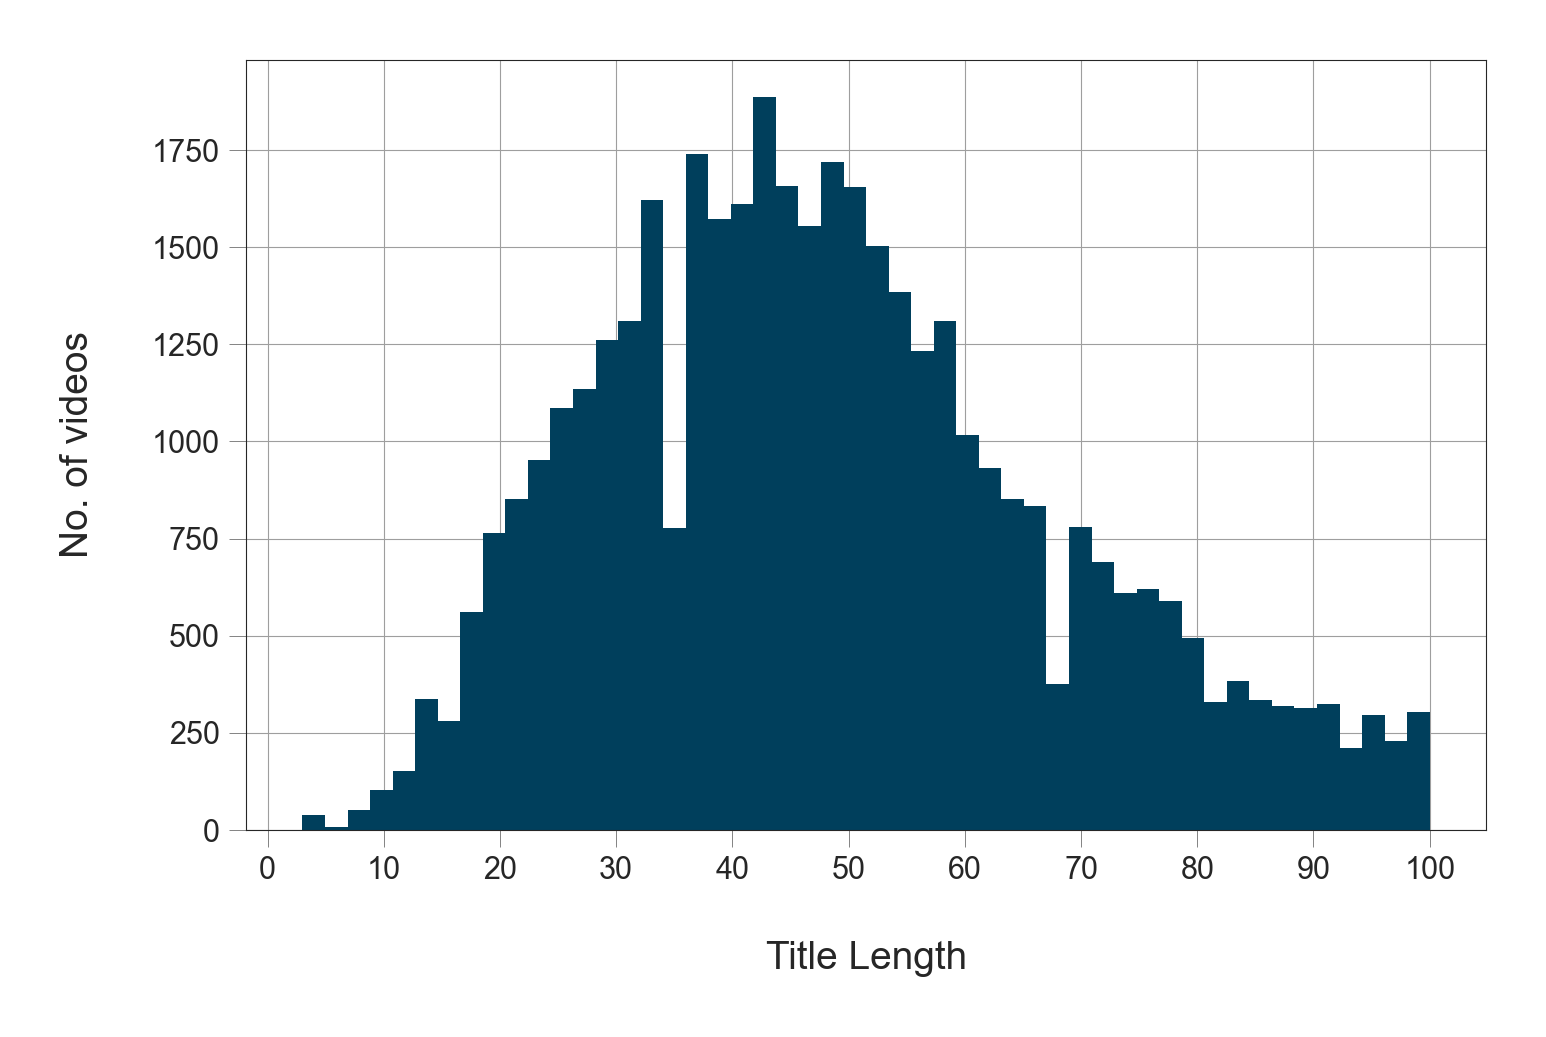

In [26]:
fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

We can see that most video title has lengths around 30 to 55.

Let's draw the scatter plot to see the relation between title lengths and number of views.

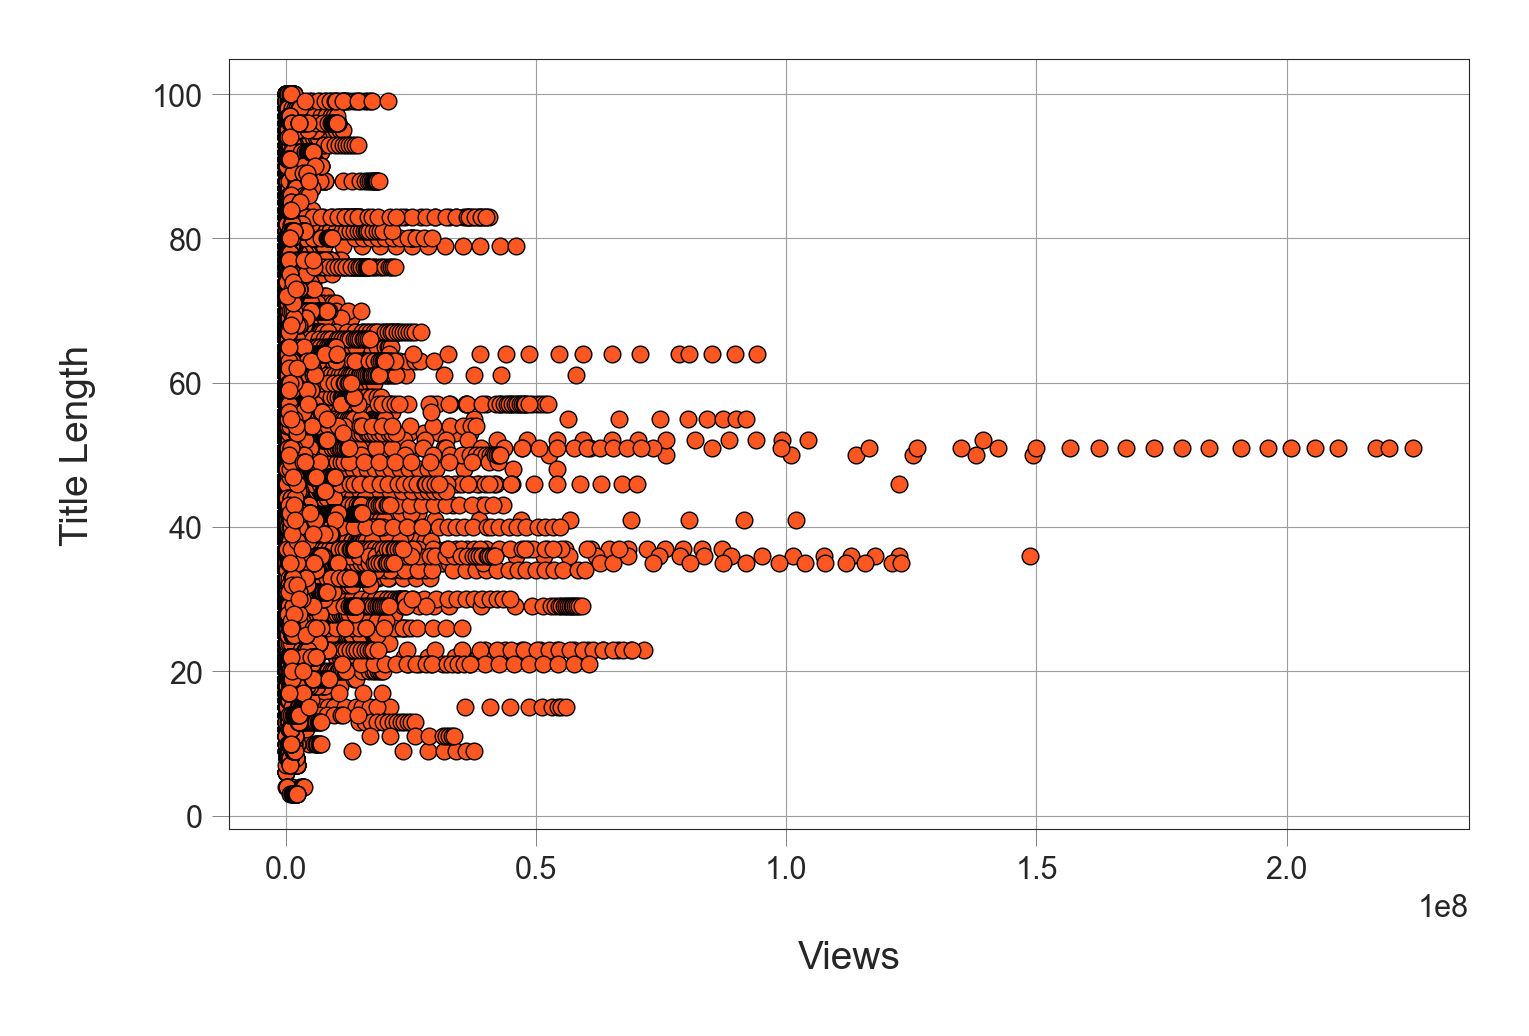

In [27]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have 100,000,000 views and more have title length between 30 and 55 characters approximately whereas videos having 150,000,000 views and more have title length between 45 and 55 characters approximately.



# Most Common Words in Video Titles

Let's see if there are some words that are used significantly in trending video titles. We will display the `25` most common words in all trending video titles.

In [28]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

We see that characters like `|` and `-` have been used a lot in video titles - 41986 and 15777 respectively. Also, words like `Movie`, `Telugu`, `Full`, `Video`, etc. are very common in video titles, each occured in more than 1500 video titles.b

Why not draw a word cloud for the titles of our trending videos? 

Word Cloud is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is.

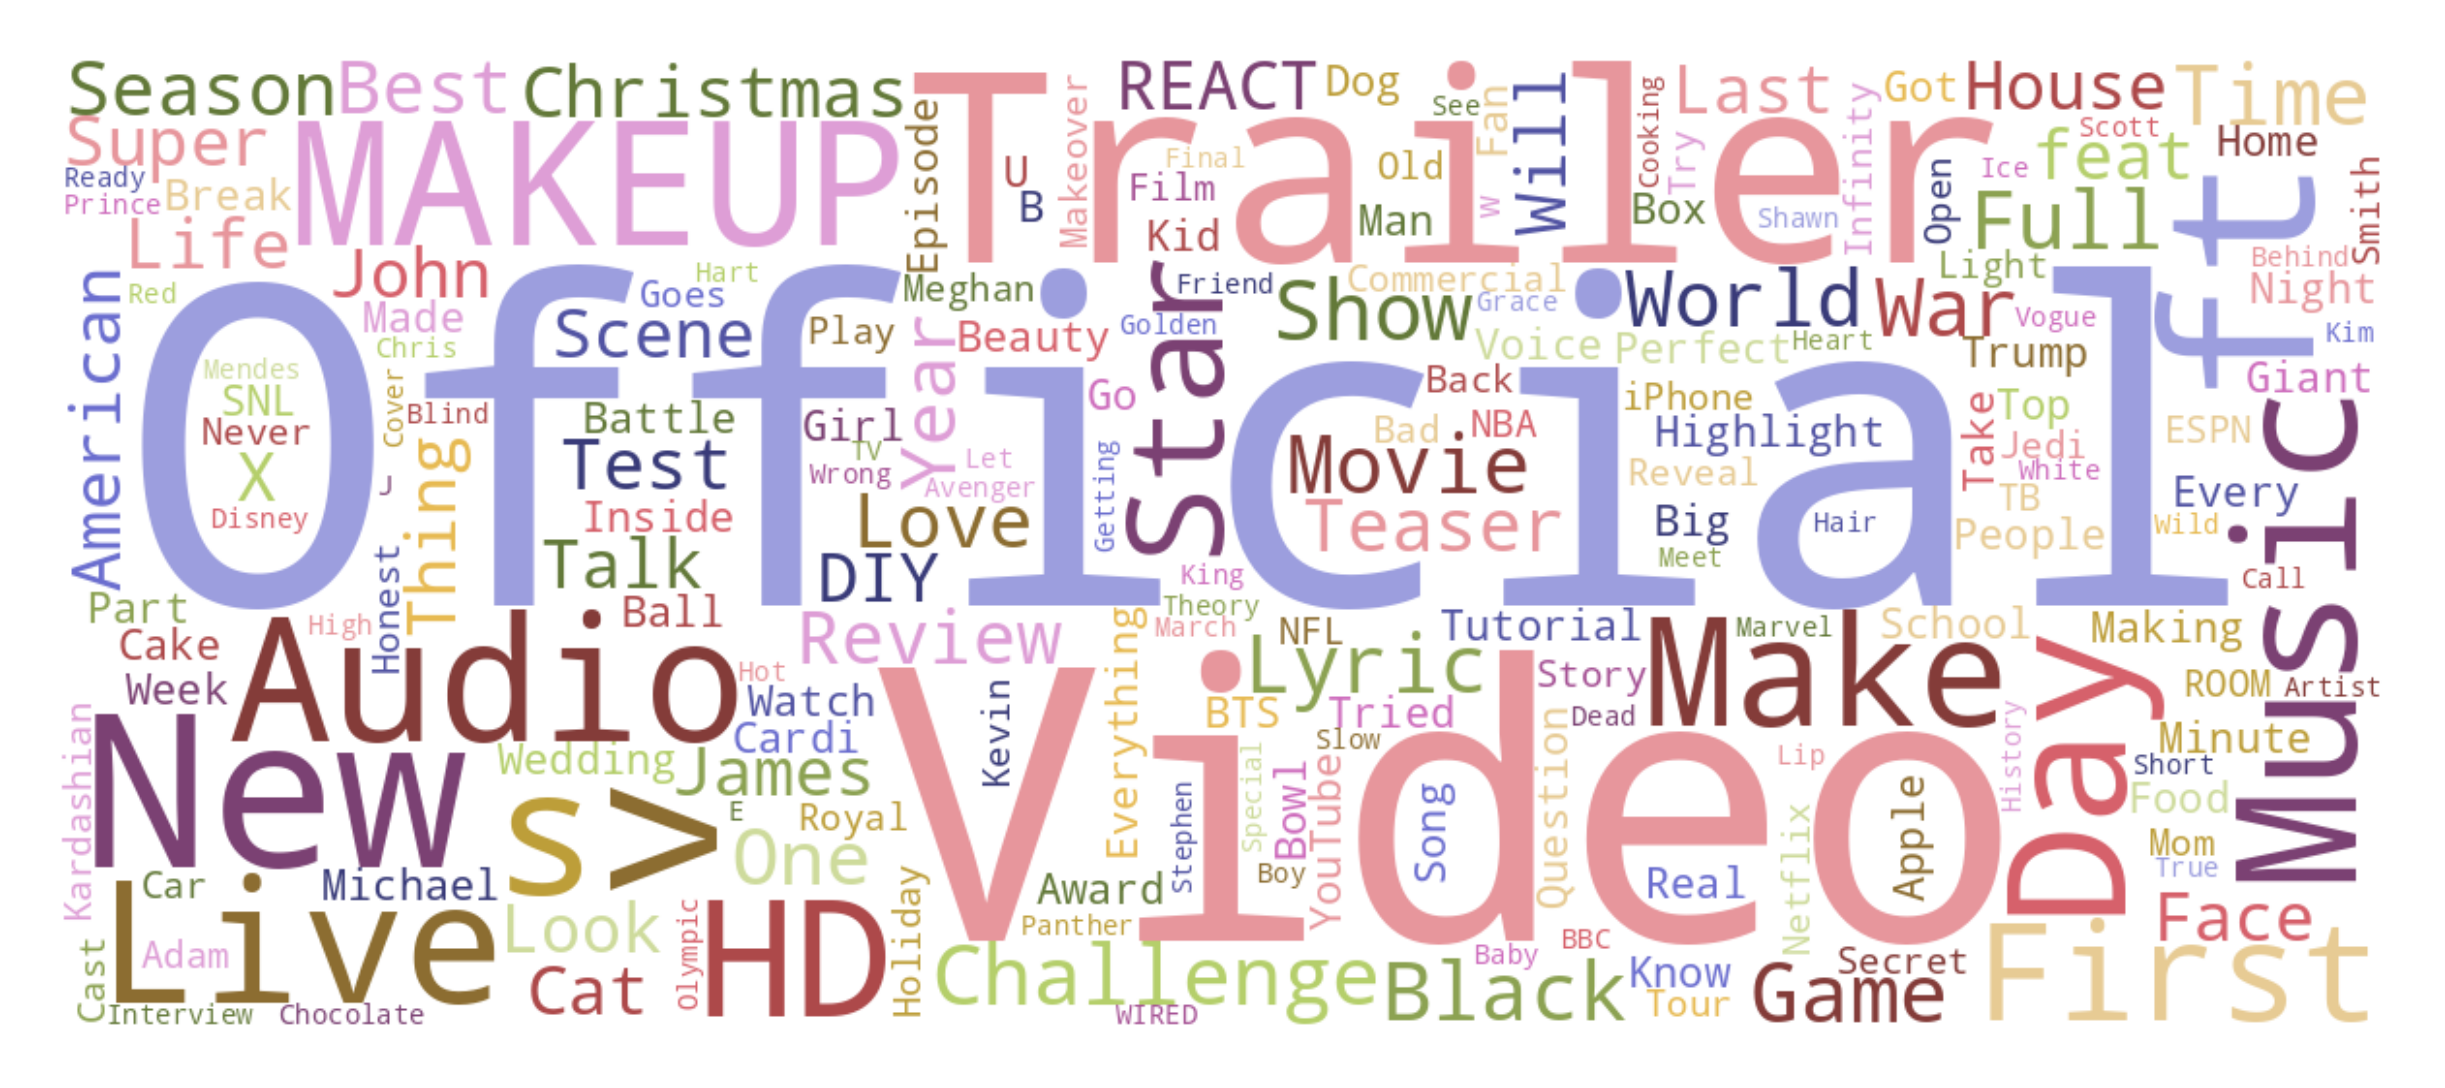

In [29]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Which channels have the largest number of trending videos?

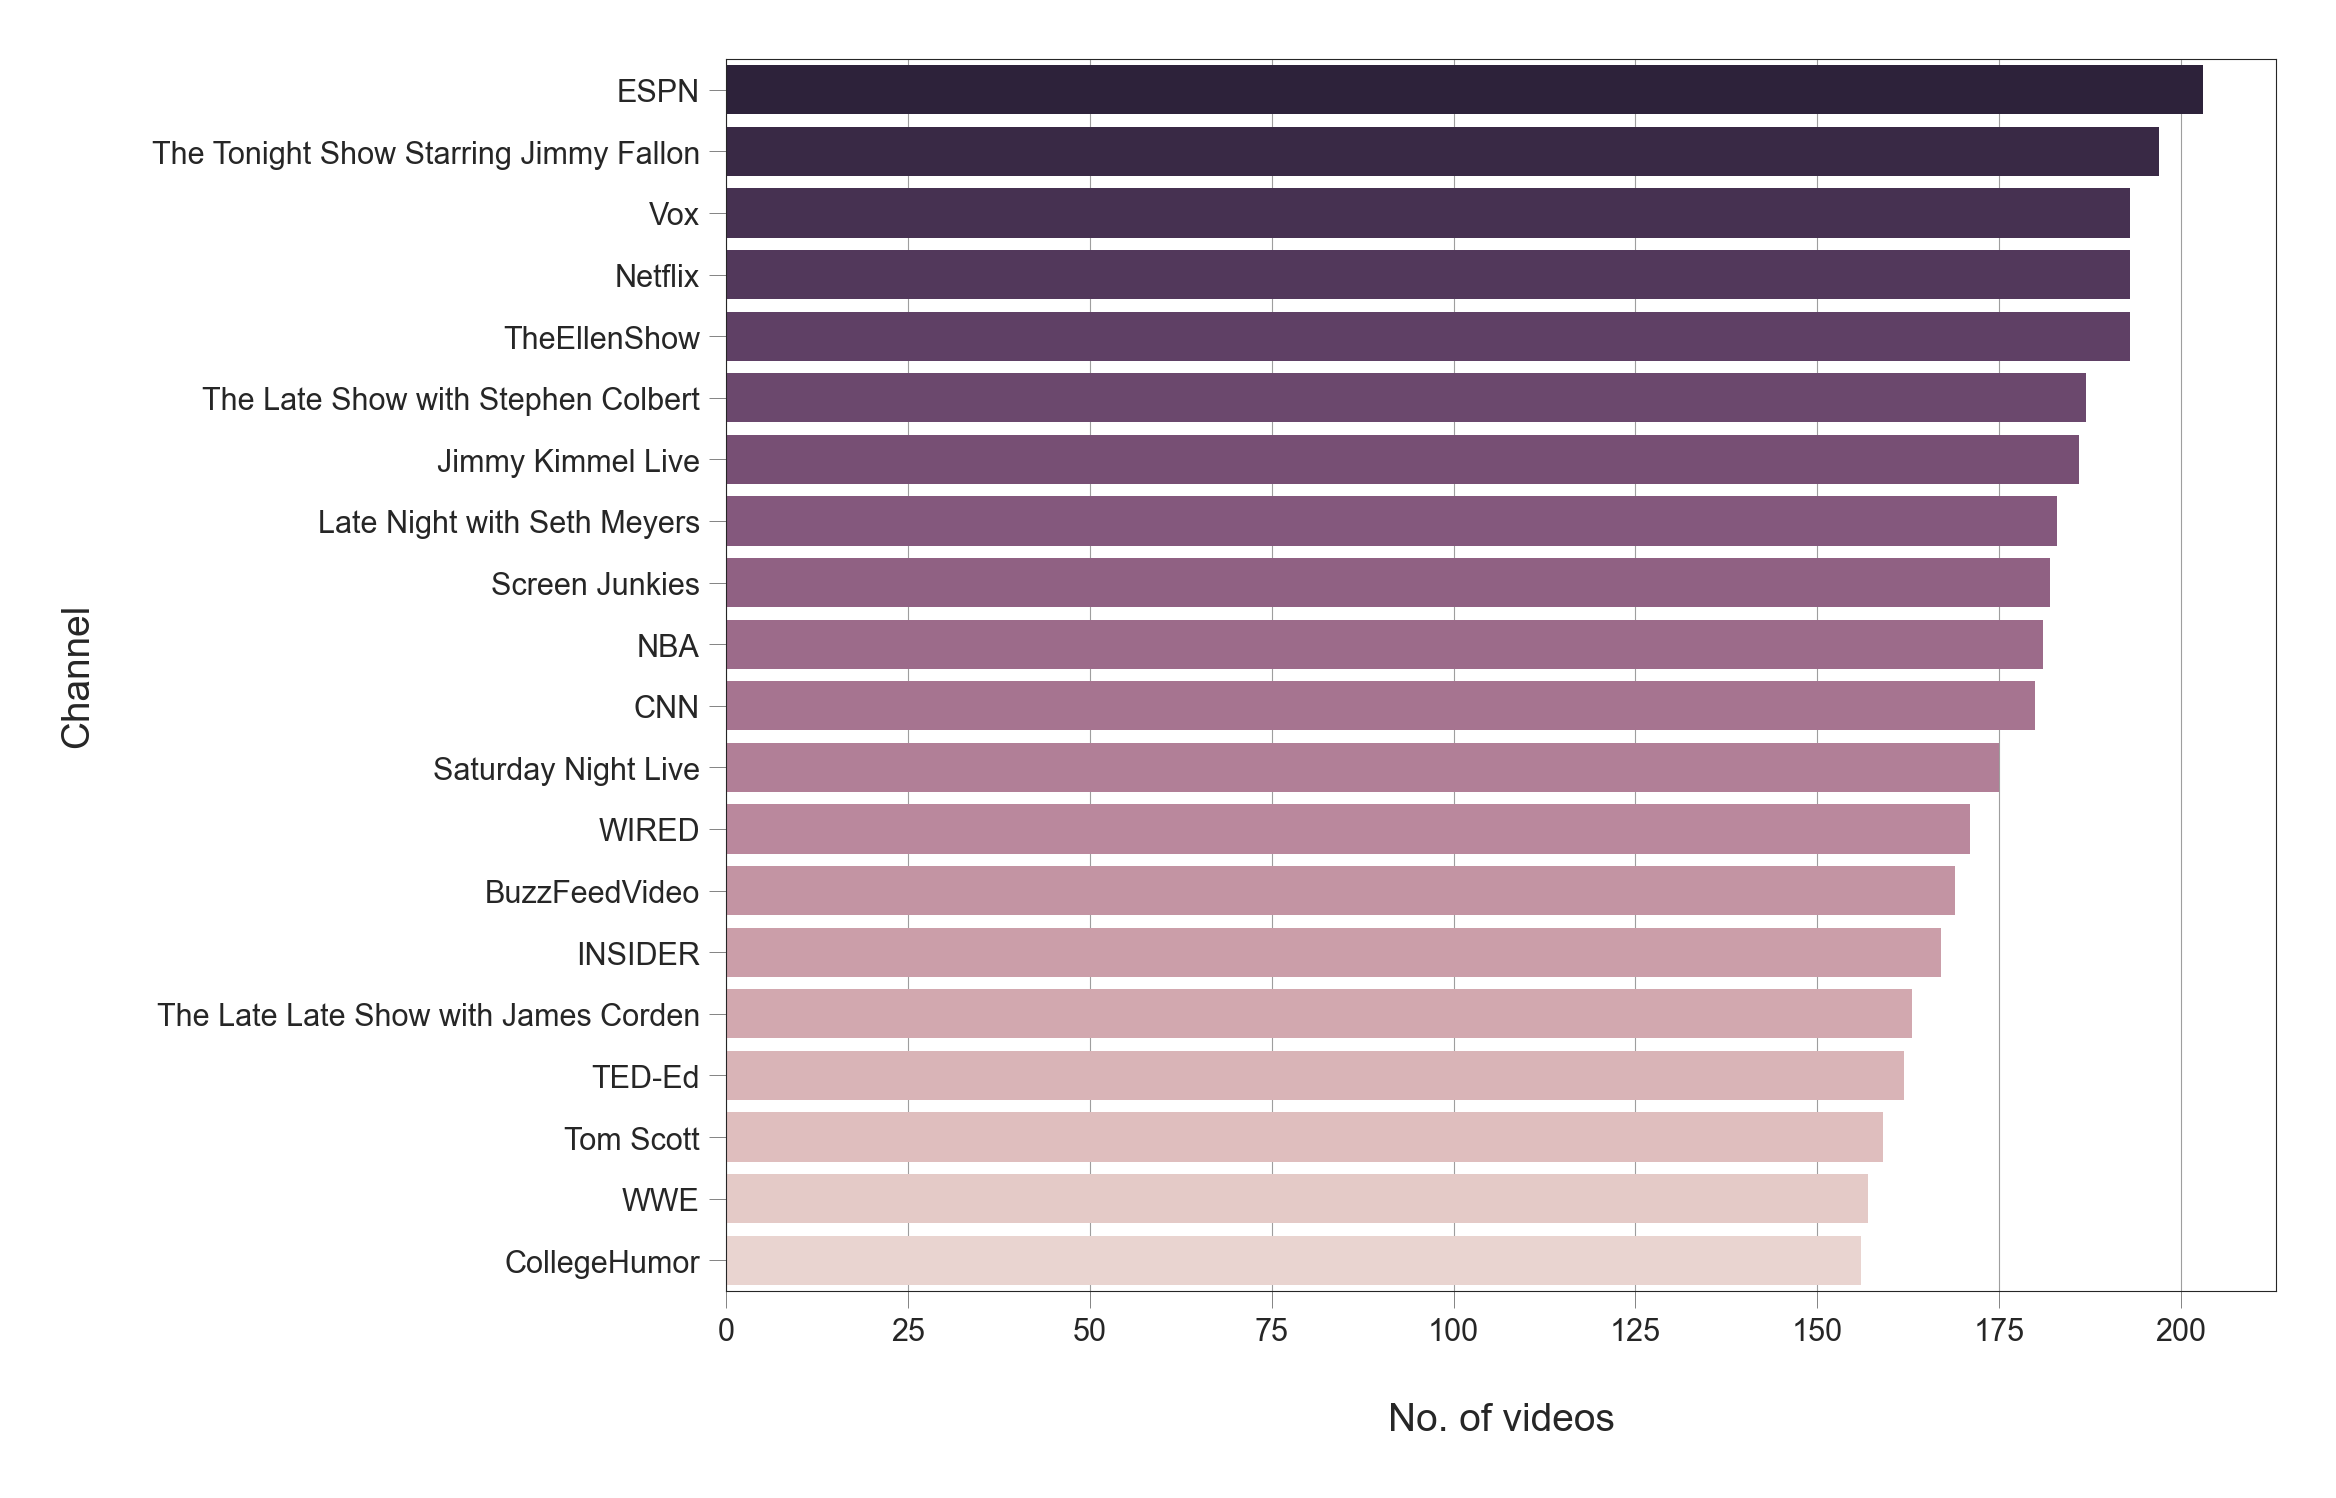

In [30]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

# Which video category has the largest number of trending videos?

First, we will add a column that contains category names based on the values in category_id column. We will use a category JSON file provided with the dataset which contains information about each category.

In [31]:
with open("./../dataset/US_category_id.json") as file:
    categories = json.load(file)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [32]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,32,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment


Now that we have added catergory_name to each video, we can see which category had the largest number of trending videos.

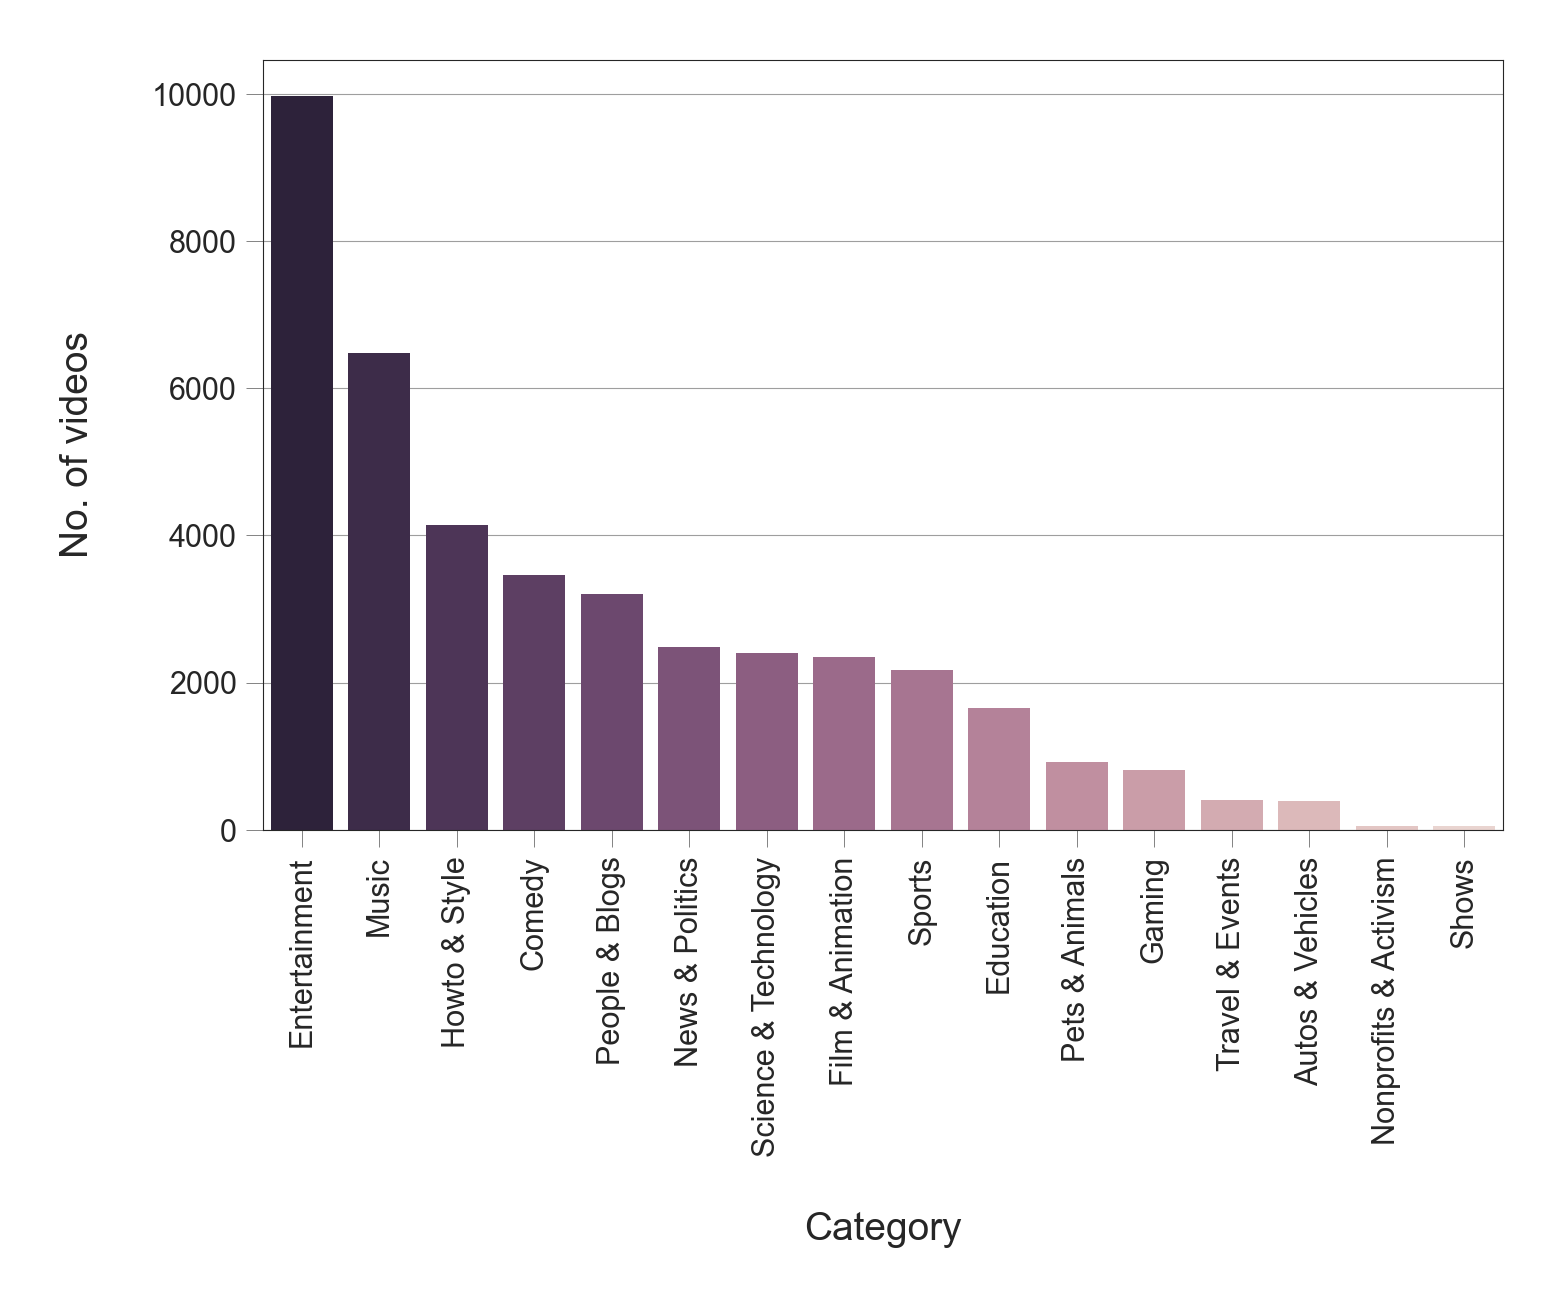

In [33]:
cdf = df["category_name"].value_counts().to_frame()

cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)

fig, ax = plt.subplots()

_ = sns.barplot(x="category_name", y="count", data=cdf, palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

_ = ax.set(xlabel="Category", ylabel="No. of videos")

In [34]:
len(df[(df["category_name"] == 'Entertainment')].index)

9964

In [35]:
len(df[(df["category_name"] == 'Music')].index)

6472

In [36]:
len(df[(df["category_name"] == 'Shows')].index)

57

In [37]:
len(df[(df["category_name"] == 'Movies')].index)

0

We see that the Entertainment category contains the largest number of trending videos among other categories: `9,964` videos, followed by Music category with `6,472` videos and so on.

The video categories having smallest number of trending videos is Movies(`0` videos) and Show category with `57` videos

# Trending videos and their publishing time

An example value of the publish_time column in our dataset is 2017-11-13T17:13:01.000Z. And according to information on this page: https://www.w3.org/TR/NOTE-datetime, this means that the date of publishing the video is 2017-11-13 and the time is 17:13:01 in Coordinated Universal Time (UTC) time zone.

Let's add two columns to represent the date and hour of publishing each video, then delete the original publish_time column because we will not need it anymore.

In [38]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

In [39]:
df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length,category_name,publishing_day,publishing_hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,34,People & Blogs,Mon,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",62,Entertainment,Mon,07
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53,Comedy,Sun,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,32,Entertainment,Mon,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24,Entertainment,Sun,18


Now we can see which days of the week had the largest numbers of trending videos.

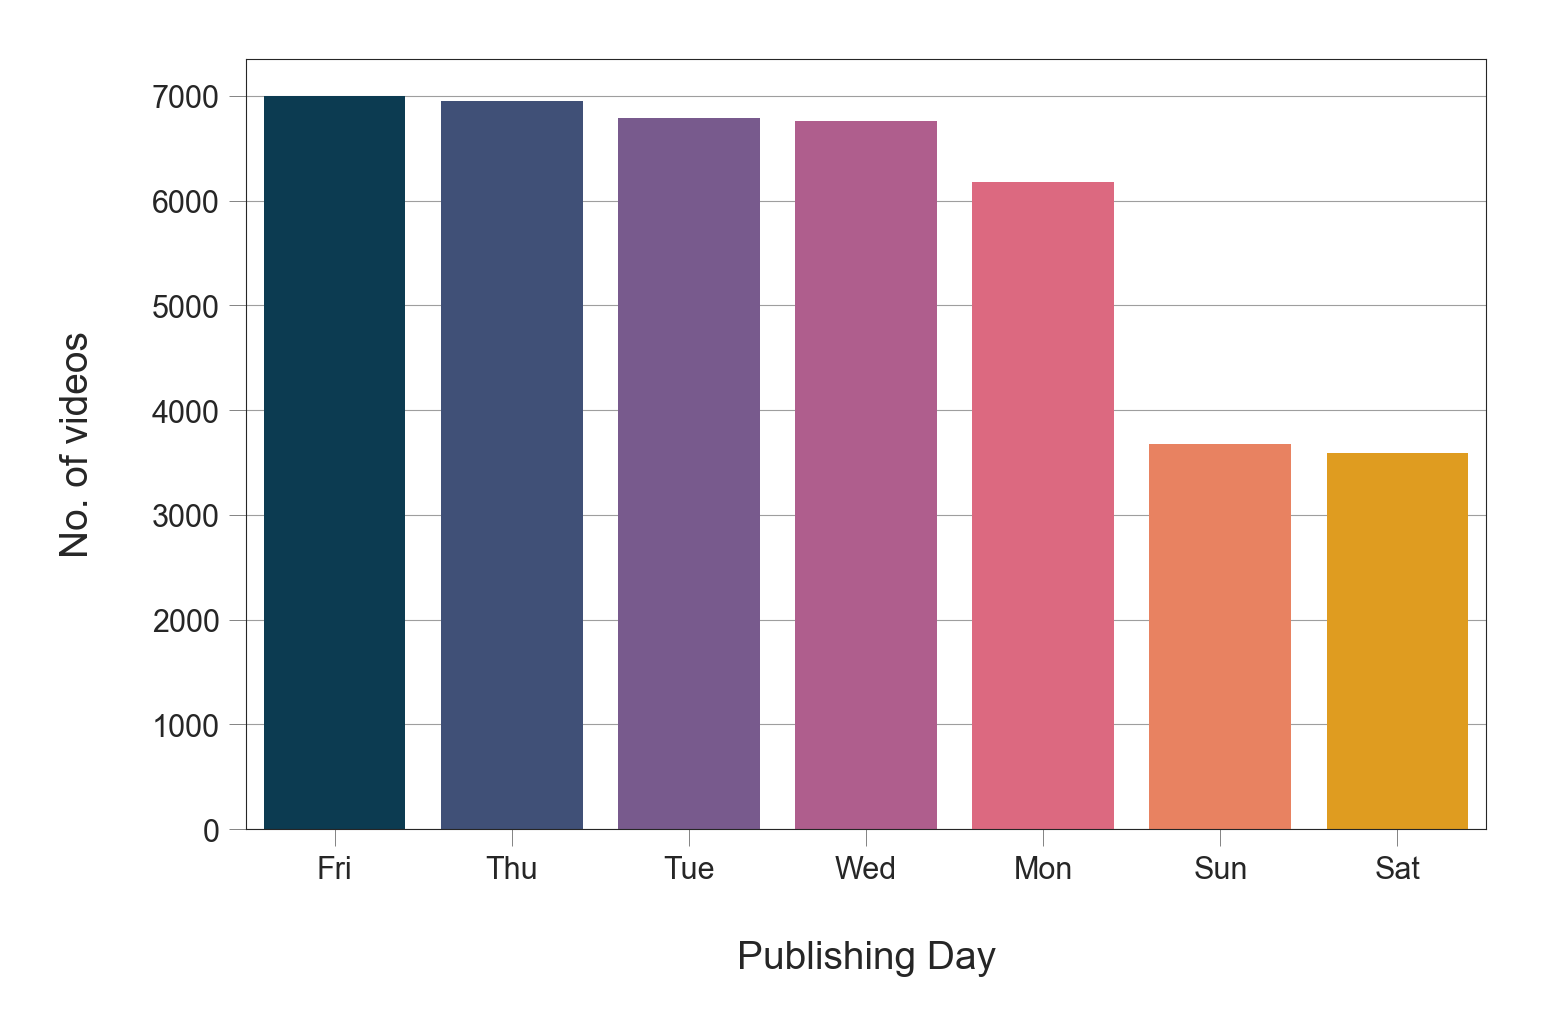

In [40]:
cdf = df["publishing_day"].value_counts().to_frame().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()

_ = sns.barplot(x="publishing_day", y="count", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos published on Saturdays and Sundays noticeably less than the number of trending videos published on other days of the week.

Now let's use publishing_hour column to see which publishing hours had the largest number of trending videos.

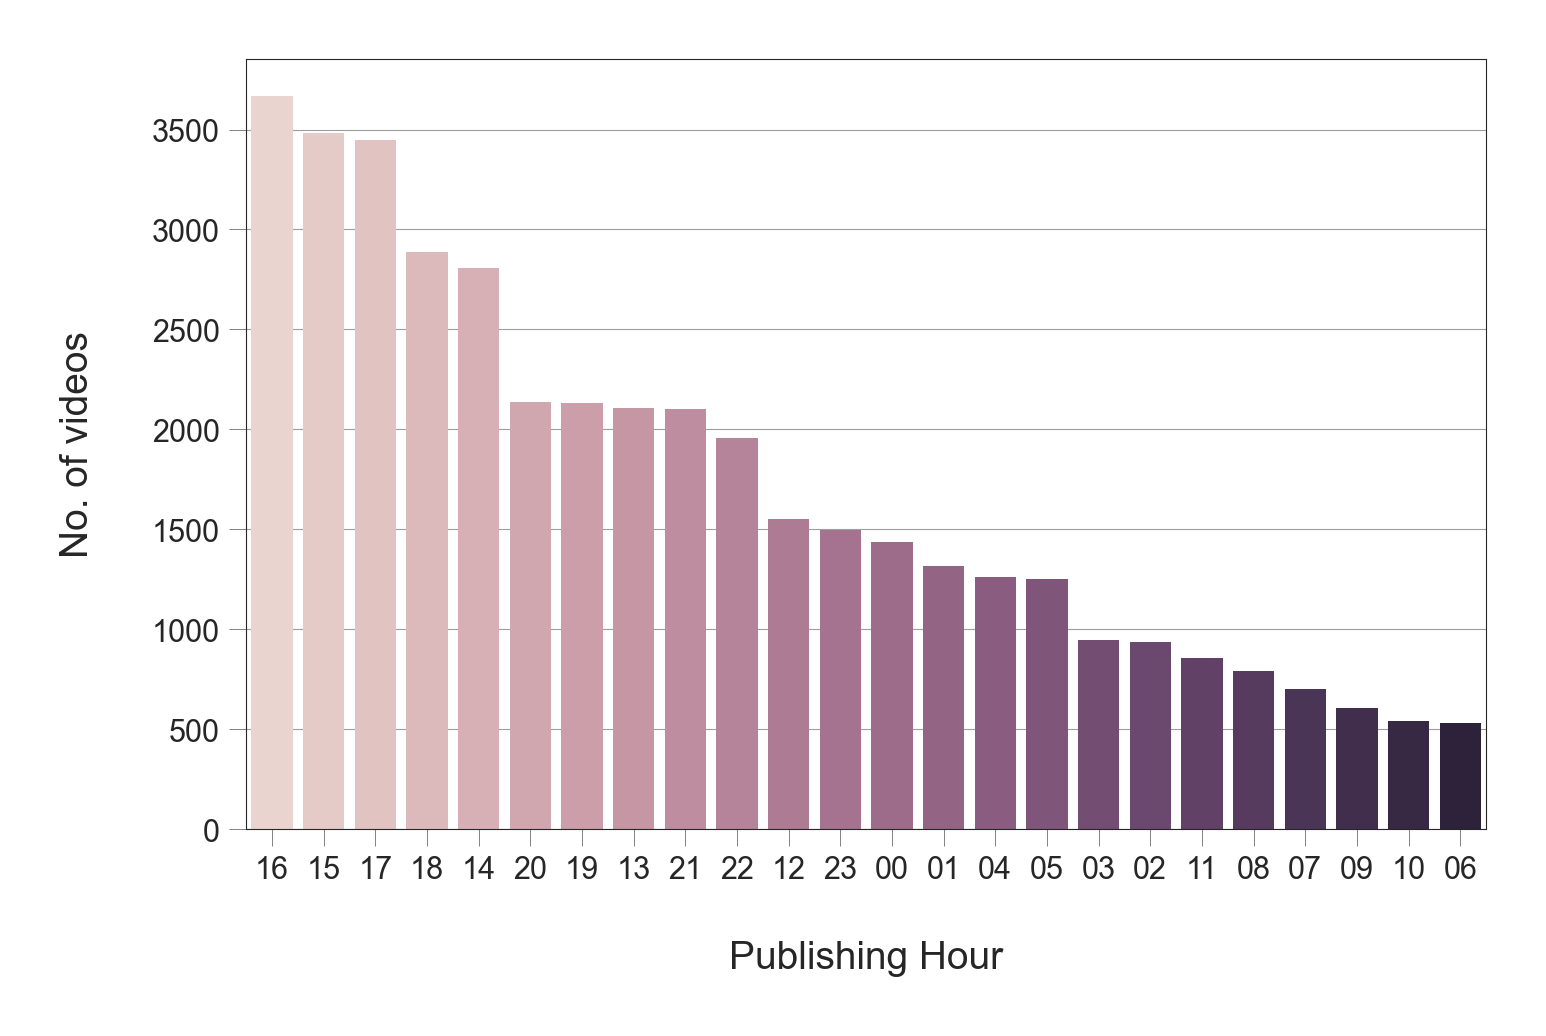

In [41]:
cdf = df["publishing_hour"].value_counts().to_frame()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="count", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

We can see that the period between 5 AM and 10 PM, peaking between 2 PM and 6 PM, had the largest number of trending videos. We notice also that the period between 6 AM and 9 AM has the smallest number of trending videos.